In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import itertools as it
from functools import partial
import sys
import progressbar
import scipy.special
folder_scaling = "data_FS_paper_haar/"

In [2]:
!ls $folder_scaling

dat_N_10_Haar_0.txt    dat_N_16_NL_8_3.txt	   dat_N_22_NL_11_21.txt
dat_N_10_Haar_1.txt    dat_N_16_NL_8_4.txt	   dat_N_22_NL_11_3.txt
dat_N_10_Haar_2.txt    dat_N_16_NL_8_5.txt	   dat_N_22_NL_11_4.txt
dat_N_10_Haar_3.txt    dat_N_16_NL_8_6.txt	   dat_N_22_NL_11_5.txt
dat_N_10_Haar_4.txt    dat_N_16_NL_8_7.txt	   dat_N_22_NL_11_6.txt
dat_N_10_Haar_5.txt    dat_N_16_NL_8_8.txt	   dat_N_22_NL_11_7.txt
dat_N_10_Haar_6.txt    dat_N_16_NL_8_9.txt	   dat_N_22_NL_11_8.txt
dat_N_10_Haar_7.txt    dat_N_18_Haar_0.txt	   dat_N_22_NL_11_9.txt
dat_N_10_Haar_8.txt    dat_N_18_Haar_1.txt	   dat_N_22_NL_22_0.txt
dat_N_10_Haar_9.txt    dat_N_18_Haar_10.txt	   dat_N_22_NL_22_1.txt
dat_N_10_NL_10_0.txt   dat_N_18_Haar_11.txt	   dat_N_22_NL_22_10.txt
dat_N_10_NL_10_1.txt   dat_N_18_Haar_12.txt	   dat_N_22_NL_22_11.txt
dat_N_10_NL_10_2.txt   dat_N_18_Haar_13.txt	   dat_N_22_NL_22_12.txt
dat_N_10_NL_10_3.txt   dat_N_18_Haar_14.txt	   dat_N_22_NL_22_13.txt
dat_N_10_NL_10_4.txt   dat_N_18_Haar_15.txt	   dat_N

In [3]:
v_N = np.array([8,10,12,14,16,18,20,22,24])
v_p = np.array([0.5,1.0,2.0,4.,-1.])

N_N = v_N.size
N_p = v_p.size

prefix = "dat"
suffix = ".txt"

In [4]:

data_list_scaled = []
err_list_scaled = []
num_list = []

# the loop with progress bar
bar = progressbar.ProgressBar(maxval=N_N*N_p, \
widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])

count = 0
bar.start()   

for i_N in range(N_N):
    N = v_N[i_N]
    dat_N = np.zeros((N_p,N+1,N+1))
    err_N = np.zeros((N_p,N+1,N+1))
    num_N = np.zeros((N_p,N))
    for i_p in range(N_p):
        p = v_p[i_p]
        for i in range(N):
            if p < 0.:
                fn = folder_scaling + prefix + "_N_" + str(N) + "_Haar_" + str(i) + suffix
            else:
                fn = folder_scaling + prefix + "_N_" + str(N) + "_NL_" + "{:.0f}".format(p*N) + "_" + str(i) + suffix
            
            try:
                data = np.loadtxt(fn)
            except:
                data = -np.ones(2,N+1)
                print("file " + fn + " does not exist")
            
            num_N[i_p,i] = data.shape[0]

            dat_N[i_p,i+1,:] = np.mean(data,axis=0)
            err_N[i_p,i+1,:] = np.std(data,axis=0)/np.sqrt(num_N[i_p,i])
            
        count += 1
        bar.update(count)
        
    data_list_scaled.append(dat_N)
    err_list_scaled.append(err_N)

bar.finish()
    
#outfile = folder + "save" + "_N_" + str(N_spin) + "_Ns_" + str(N_sample)
#np.save(outfile, full_data)

[========================================================================] 100%


In [5]:
#The analytical bound
def S_bound_Dicke(N, k, j):
    def S_term(q):
        lam = ( scipy.special.factorial(N-j)*scipy.special.factorial(N-k)*scipy.special.factorial(q) /
                (scipy.special.factorial(N - k - j + q)*scipy.special.factorial(N) ) *
                scipy.special.binom(j,q)*scipy.special.binom(k,q) )
        return -lam*np.log(lam)
    
    v_q = np.arange(max(0,j+k-N), min(j,k)+1)
    return np.sum(S_term(v_q))

S_bound_Dicke(22,1,11)

0.6931471805599452

0.045454545454545456
0.003952569169960474
0.0004940711462450593
7.905138339920949e-05
1.5202189115232595e-05
3.3782642478294654e-06
8.445660619573664e-07
2.329837412296183e-07
6.989512236888549e-08
2.2546813667382417e-08
7.750467198162706e-09
2.818351708422802e-09
1.077605064985189e-09
4.310420259940756e-10
1.7960084416419817e-10
7.766522990884246e-11
3.474497127500847e-11
1.6036140588465447e-11
7.617166779521087e-12
3.715691111961506e-12
1.857845555980753e-12


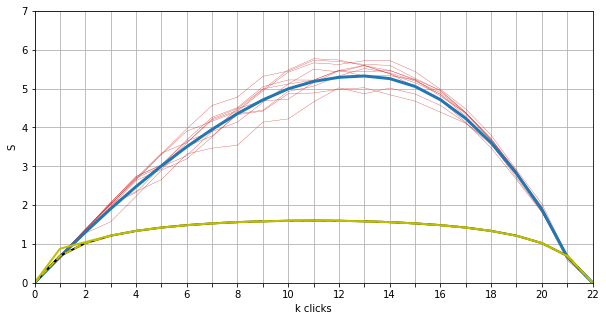

In [30]:
# some trajectories for fig 1c + analytical bound
N = 22
p = -1.
max_rows = 10 # trajectories to sample

i_site = N//2


# the analytical bound
v_S_mixed = np.zeros(N+1)
v_S_pure = np.zeros(N+1)
v_S_test = np.zeros(N+1)

beta_moment = 1
for k in range(1,N):
    beta_moment *= (k)/(N+k-1)

    v_w_mixed = []
    v_w_pure = []
    v_w_test = []
    for ka in range(k+1):
        nenv = scipy.special.binom(N-i_site,k-ka)    # jump combinations in environment  
        ntot = scipy.special.binom(N,k) # total jump combinations
        w = nenv/ntot # the weight of each number sector after tracing out environment
        nw = int(scipy.special.binom(i_site,ka))  # jump combinations on A
        v_w_mixed += [w]*nw
        v_w_pure += [w*nw]
        n_test = int(min(k,N-k))**2
        #print(n_test)
        v_w_test += [w/n_test*nw]*n_test
        #v_w_test += [w*beta_moment]*int(1./beta_moment)

    v_w_mixed = np.array(v_w_mixed)
    v_w_mixed = v_w_mixed[v_w_mixed>0.]
    v_w_pure = np.array(v_w_pure)
    v_w_pure = v_w_pure[v_w_pure>0.]
    v_w_test = np.array(v_w_test)
    v_w_test = v_w_test[v_w_test>0.]
    
    kappa = beta_moment
    print(kappa)
    S_rho_k = -kappa*np.log(kappa) -(1.-kappa)*np.log(1.-kappa)

    v_S_mixed[k] = -np.sum(v_w_mixed*np.log(v_w_mixed))
    v_S_pure[k] = -np.sum(v_w_pure*np.log(v_w_pure))
    v_S_test[k] = np.sum(v_w_pure*(S_rho_k-np.log(v_w_pure)) )

skiprows = 20
rows = np.random.randint(0,4*128,size=max_rows)

i_N = np.argmin(np.abs(v_N-N))
i_p = np.argmin(np.abs(v_p-p))

av_S = data_list_scaled[i_N][i_p]

samples=np.zeros((max_rows,N+1))
for i in range(N):
    if p < 0.:
        fn = folder_scaling + prefix + "_N_" + str(N) + "_Haar_" + str(i) + suffix
    else:
        fn = folder_scaling + prefix + "_N_" + str(N) + "_NL_" + "{:.0f}".format(p*N) + "_" + str(i) + suffix
    dat = np.loadtxt(fn)[:,i_site]
    samples[:,i+1] = dat[rows]

av_S = data_list_scaled[i_N][i_p,:,i_site]


# the plot
x_axis = np.linspace(0,N,N+1)
fig = plt.figure(figsize=(10,5))
plt.plot(x_axis,samples.T,linewidth=0.3, color="tab:red")
plt.plot(x_axis,av_S,linewidth=3,color="tab:blue")
#plt.plot(x_axis,v_S_mixed,linewidth=2,color="k")
plt.plot(x_axis,v_S_pure,linewidth=2,color="k")
plt.plot(x_axis,v_S_test,linewidth=2,color="y")
plt.plot(x_axis,[S_bound_Dicke(N,q,i_site) for q in x_axis],linewidth=2,linestyle="--",color="y")

plt.xlim([0, N])
plt.ylim(ymin=0,ymax=7.)

plt.xlabel("k clicks")
plt.ylabel("S")

xlabels = []
for i in range(0,N+1):
    if i%2==0:
        xlabels.append( str(i) )
    else:
        xlabels.append( "" )
p=plt.xticks(x_axis[0:N+1:1],labels=xlabels)
plt.grid()

#plt.savefig("figs_paper/sample_trajectories.pdf")

In [28]:
np.array(range(N+1,N+1))

array([], dtype=float64)

[ 0.25753106 -0.3233223 ]


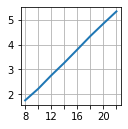

In [10]:
# for 1c inset scaling
plt.figure(figsize=(1.8,1.8))

i_p = -1

i_cut = N_N-1
x_axis = v_N[:i_cut]


p = v_p[i_p]
dat_plot = []
dat_err = []

for i_N in range(i_cut):
    N = v_N[i_N]

    ind = np.unravel_index(np.argmax(data_list_scaled[i_N][i_p], axis=None), data_list_scaled[i_N][i_p].shape)
    dat_plot.append(data_list_scaled[i_N][i_p][ind])
    dat_err.append(err_list_scaled[i_N][i_p][ind])

_ = plt.plot(x_axis,dat_plot, color = "tab:blue", linewidth=2)
#_ = plt.plot(x_axis,np.log(2)*x_axis,"--k")
#plt.ylim()
plt.grid(True)

xlabels = []
for i in range(np.min(v_N),N+1,2):
    if i%4==0:
        xlabels.append( str(i) )
    else:
        xlabels.append( "" )

_ = plt.xticks(x_axis,labels=xlabels)

#plt.xlabel("M spin")
#plt.ylabel(r"$S_{max}$")
#plt.legend(loc="upper left")

#plt.savefig("figs_paper/Smax_inset.pdf", bbox_inches='tight')
print(np.polyfit(x_axis, dat_plot, deg=1))

([<matplotlib.axis.XTick at 0x153b49a3d340>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

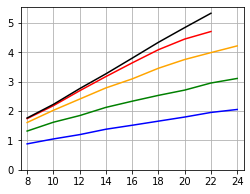

In [11]:
figsize = (4,3)

plt.figure(figsize=figsize)

x_axis = v_N

clr = ["blue", "green", "orange","red","black", "blue", "green", "orange","red"]

trunc = [None,None,None,-1,-1]

for i_p in range(N_p):
    p = v_p[i_p]
    dat_plot = []
    dat_err = []
    
    for i_N in range(N_N):
        N = v_N[i_N]

        ind = np.unravel_index(np.argmax(data_list_scaled[i_N][i_p], axis=None), data_list_scaled[i_N][i_p].shape)
        dat_plot.append(data_list_scaled[i_N][i_p][ind])
        dat_err.append(err_list_scaled[i_N][i_p][ind])
        
        if i_p == N_p-1:
            label = "Haar"
            color = "black"
        else:
            label = "p="+str(p)
            color = clr[i_p]
    
    _ = plt.plot(v_N[:trunc[i_p]],dat_plot[:trunc[i_p]], color = color, label=label)
    #_ = plt.errorbar(v_N[:trunc[i_p]],dat_plot[:trunc[i_p]], yerr=dat_err[:trunc[i_p]], capsize=3, color = clr[i_p], label=label)


plt.ylim(bottom=0.)
plt.xlim(np.min(x_axis)-0.5, np.max(x_axis)+0.5)
plt.grid(True)

plt.xticks(v_N)

#plt.xlabel("N spin")
#plt.ylabel(r"$S_{max}$")
#plt.legend()

#plt.savefig("figs_paper/Smax_N_scaled.pdf", bbox_inches='tight')

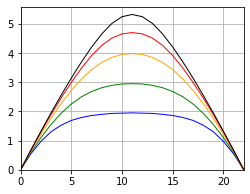

In [12]:
N_plot = 22
i_jump = 13

plt.figure(figsize=figsize)

i_N = np.argmin(np.abs(v_N-N_plot))

x_axis = np.linspace(0,N_plot,N_plot+1)


for i_p in range(N_p):
    p = v_p[i_p]
    
    i_jump = np.argmax(data_list_scaled[i_N][i_p,:,N_plot//2])
    
    dat = data_list_scaled[i_N][i_p,i_jump,:]
    err = err_list_scaled[i_N][i_p,i_jump,:]
    dat = 0.5*(dat+np.flip(dat))
    err = 0.5*np.sqrt(err**2+np.flip(err)**2)

    if i_p == N_p-1:
        label = "Haar"
    else:
        label = "p="+str(p)
    
    #_ = plt.errorbar(x_axis,0.5*(dat+np.flip(dat)), yerr=err_S[i_L,i_jump,:], linewidth = 1, color = 'black')
    _ = plt.plot(x_axis,dat , linewidth = 1, color=clr[i_p], label=label)
    #_ = plt.errorbar(x_axis,dat , yerr=err, linewidth = 1, capsize=3, color=clr[i_p], label=label)
    #_ = plt.plot(x_axis,dat, linewidth = 1, color='blue')

plt.xlim(0,N_plot)
plt.ylim(bottom=0.)
plt.grid(True)

#plt.xlabel("subsystem size l")
#plt.ylabel(r"$S_l$")
#plt.legend(loc="right")
#plt.title("N="+str(N_plot))

#plt.savefig("figs_paper/St_" + str(N_plot) + "_" + str(i_jump) + "_scaled.pdf", bbox_inches='tight')

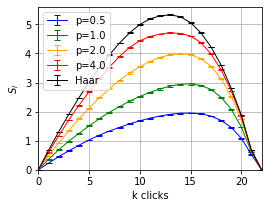

In [13]:
N_plot = 22
i_site = (N_plot+1)//2

plt.figure(figsize=figsize)

i_N = np.argmin(np.abs(v_N-N_plot))

x_axis = np.linspace(0,N_plot,N_plot+1)


for i_p in range(N_p):
    p = v_p[i_p]
    dat = data_list_scaled[i_N][i_p,:,i_site]
    err = err_list_scaled[i_N][i_p,:,i_site]
    
    if i_p == N_p-1:
        label = "Haar"
    else:
        label = "p="+str(p)

    #_ = plt.errorbar(x_axis,0.5*(dat+np.flip(dat)), yerr=err_S[i_L,i_jump,:], linewidth = 1, color = 'black')
    _ = plt.errorbar(x_axis,dat , yerr=err, linewidth = 1, capsize=3, color=clr[i_p], label=label)
    #_ = plt.plot(x_axis,dat, linewidth = 1, color='blue')

plt.xlim(0,N_plot)
plt.ylim(bottom=0.)
plt.grid(True)

plt.xlabel("k clicks")
plt.ylabel(r"$S_l$")
plt.legend()
#plt.title("N="+str(N_plot))

#plt.savefig("figs_paper/S_half_" + str(N_plot) + "_scaled.pdf", bbox_inches='tight')

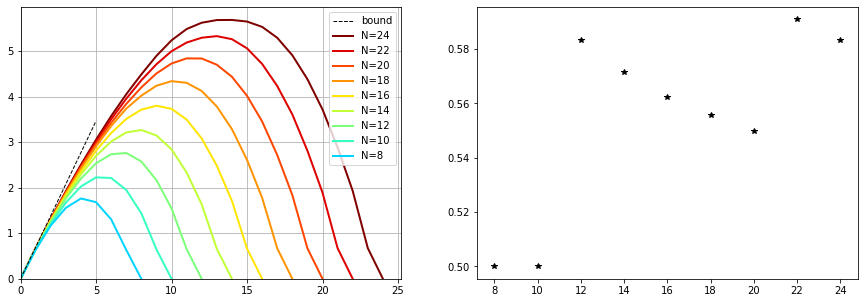

In [18]:
p_plot = -1.

fig, ax = plt.subplots(1,2,figsize=(15,5))

i_p = np.argmin(np.abs(v_p-p_plot))

clr = plt.cm.jet(v_N/np.max(v_N))  

est_label = "bound"
x_axis = np.linspace(0.,5.,10)
ax[0].plot(x_axis, np.log(2.)*x_axis, color = "k", linestyle="--", linewidth=1, label=est_label, zorder=N_N)


labels = []
for i_N in range(N_N-1,-1,-1):
    N = v_N[i_N]
    i_site = (N+1)//2
    dat = data_list_scaled[i_N][i_p,:,i_site]
    err = err_list_scaled[i_N][i_p,:,i_site]
    i_max = np.argmax(dat)
    
    label = "N=" + str(N)
        
    x_axis = np.linspace(0,N,N+1)

    #_ = plt.errorbar(x_axis,0.5*(dat+np.flip(dat)), yerr=err_S[i_L,i_jump,:], linewidth = 1, color = 'black')
    #_ = plt.errorbar(x_axis,dat , yerr=err, linewidth = 2, capsize=3, color=clr[i_N], label=label)
    _ = ax[0].plot(x_axis,dat , linewidth = 2, color=clr[i_N], label=label)
    _ = ax[1].plot(N,i_max/N , "*", color="k")
    #_ = plt.plot(x_axis,dat, linewidth = 1, color='blue')
    labels.append( label )




ax[0].set_xlim(0,None)
ax[0].set_ylim(bottom=0., top=None)
ax[0].grid(True)

#plt.xlabel("k clicks")
#plt.ylabel(r"$S_l$")
ax[0].legend(loc=1)

#plt.savefig("figs_paper/estimate_full.pdf")

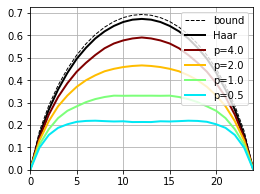

In [30]:
N_plot = 24
i_k = 1

i_N = np.argmin(np.abs(v_N-N_plot))

clr = plt.cm.jet((v_p[:-1]/np.max(v_p))**(1/2)) 
v_l = np.linspace(0+1e-5,N_plot-1e-5,N_plot+1)

plt.figure(figsize=figsize)

S_est = -np.log(v_l/N_plot) - (N_plot-v_l)/N_plot*np.log((N_plot-v_l)/v_l)
plt.plot(v_l, S_est, linewidth=1, color="black", linestyle="--",label="bound")

for i_p in range(N_p-1,-1,-1):
    p = v_p[i_p]
    dat = data_list_scaled[i_N][i_p,i_k,:]
    if i_p == N_p-1:
        plt.plot( v_l, 0.5*(dat+np.flip(dat)), linewidth=2, color="black", label="Haar" )
    else:
        plt.plot( v_l, 0.5*(dat+np.flip(dat)), linewidth=2, color=clr[i_p], label="p="+str(p) )

plt.legend(loc='upper right')
plt.xlim([0,N_plot])
plt.ylim(bottom=0.)
plt.grid()

plt.savefig("figs_paper/one_jump.pdf")


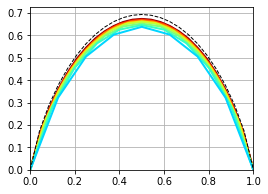

In [92]:
i_p = -1
i_k = 1

i_N = np.argmin(np.abs(v_N-N_plot))

clr = plt.cm.jet((v_N/np.max(v_N))) 

plt.figure(figsize=figsize)

v_l = np.linspace(0+1e-5,np.max(v_N)-1e-5,np.max(v_N)+1)
S_est = -np.log(v_l/np.max(v_N)) - (np.max(v_N)-v_l)/np.max(v_N)*np.log((np.max(v_N)-v_l)/v_l)
plt.plot(v_l/np.max(v_N), S_est, linewidth=1, color="black", linestyle="--",label="bound",zorder=N_N)

for i_N in range(N_N-1,-1,-1):
    N = v_N[i_N]
    dat = data_list_scaled[i_N][i_p,i_k,:]
    x = np.linspace(0,1,N+1)
    plt.plot( x, 0.5*(dat+np.flip(dat)), linewidth=2, color=clr[i_N], label="N="+str(N) )

#plt.legend(loc='upper right')
plt.xlim([0,1])
plt.ylim(bottom=0.)
plt.grid()

plt.savefig("figs_paper/one_jump.pdf")

In [53]:
range(10,0,-1)[9]

1

In [35]:
v_p[:-1]/np.max(v_p)

array([0.125, 0.25 , 0.5  , 1.   ])

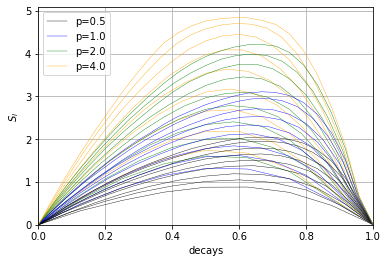

In [13]:
plt.figure(figsize=(6,4))

for N_plot in v_N:
    i_site = (N_plot+1)//2

    i_N = np.argmin(np.abs(v_N-N_plot))

    x_axis = np.linspace(0,N_plot,N_plot+1)/N_plot


    for i_p in range(N_p):
        p = v_p[i_p]
        dat = data_list_scaled[i_N][i_p,:,i_site]
        #err = err_list_fixed[i_N][i_p,:,i_site]

        if i_N==0:
            _ = plt.plot(x_axis,dat , linewidth = .4, color=clr[i_p], label="p="+str(p))
        else:
            _ = plt.plot(x_axis,dat , linewidth = .4, color=clr[i_p], label="")
        
        #_ = plt.plot(x_axis,dat, linewidth = 1, color='blue')

plt.xlim(0,1)
plt.ylim(bottom=0.)
plt.grid(True)

plt.xlabel("decays")
plt.ylabel(r"$S_l$")
plt.legend()
#plt.title("N=16,20,24,28,32")

#plt.savefig("figs_paper/S_half_all_N_scaled.pdf", bbox_inches='tight')

## contstant number of layers

In [31]:
folder_fixed = "data_FS_paper_fixed_layer/"
!ls $folder_fixed

dat_N_100_NL_10_0.txt	dat_N_40_NL_8_26.txt   dat_N_70_NL_8_38.txt
dat_N_100_NL_10_1.txt	dat_N_40_NL_8_27.txt   dat_N_70_NL_8_39.txt
dat_N_100_NL_10_10.txt	dat_N_40_NL_8_28.txt   dat_N_70_NL_8_4.txt
dat_N_100_NL_10_11.txt	dat_N_40_NL_8_29.txt   dat_N_70_NL_8_40.txt
dat_N_100_NL_10_12.txt	dat_N_40_NL_8_3.txt    dat_N_70_NL_8_41.txt
dat_N_100_NL_10_13.txt	dat_N_40_NL_8_30.txt   dat_N_70_NL_8_42.txt
dat_N_100_NL_10_14.txt	dat_N_40_NL_8_31.txt   dat_N_70_NL_8_43.txt
dat_N_100_NL_10_15.txt	dat_N_40_NL_8_32.txt   dat_N_70_NL_8_44.txt
dat_N_100_NL_10_16.txt	dat_N_40_NL_8_33.txt   dat_N_70_NL_8_45.txt
dat_N_100_NL_10_17.txt	dat_N_40_NL_8_34.txt   dat_N_70_NL_8_46.txt
dat_N_100_NL_10_18.txt	dat_N_40_NL_8_35.txt   dat_N_70_NL_8_47.txt
dat_N_100_NL_10_19.txt	dat_N_40_NL_8_36.txt   dat_N_70_NL_8_48.txt
dat_N_100_NL_10_2.txt	dat_N_40_NL_8_37.txt   dat_N_70_NL_8_49.txt
dat_N_100_NL_10_20.txt	dat_N_40_NL_8_38.txt   dat_N_70_NL_8_5.txt
dat_N_100_NL_10_21.txt	dat_N_40_NL_8_39.txt   dat_N_70_NL_8_50.txt


In [32]:
v_N = np.array([10,20,30,40,50,60,70,80,90,100])
v_p = np.array([2, 4, 6, 8])

N_N = v_N.size
N_p = v_p.size

prefix = "dat"
suffix = ".txt"

In [33]:


data_list_fixed = []
err_list_fixed = []
num_list = []

# the loop with progress bar
bar = progressbar.ProgressBar(maxval=N_N*N_p, \
widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])

count = 0
bar.start()   

for i_N in range(N_N):
    N = v_N[i_N]
    dat_N = np.zeros((N_p,N+1,N+1))
    err_N = np.zeros((N_p,N+1,N+1))
    num_N = np.zeros((N_p,N))
    for i_p in range(N_p):
        p = v_p[i_p]
        for i in range(N):
            fn = folder_fixed + prefix + "_N_" + str(N) + "_NL_" + "{:.0f}".format(p) + "_" + str(i) + suffix
            
            try:
                data = np.loadtxt(fn)
            except:
                data = -np.ones(2,N+1)
            
            num_N[i_p,i] = data.shape[0]

            dat_N[i_p,i+1,:] = np.mean(data,axis=0)
            err_N[i_p,i+1,:] = np.std(data,axis=0)/np.sqrt(num_N[i_p,i])
            
        count += 1
        bar.update(count)
        
    data_list_fixed.append(dat_N)
    err_list_fixed.append(err_N)

bar.finish()
    

[========================================================================] 100%


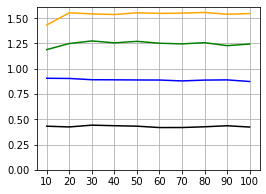

In [34]:
#outfile = folder + "save" + "_N_" + str(N_spin) + "_Ns_" + str(N_sample)
#np.save(outfile, full_data)

plt.figure(figsize=figsize)

x_axis = v_N

clr = ["black", "blue", "green", "orange","red","black", "blue", "green", "orange","red"]

for i_p in range(N_p):
    p = v_p[i_p]
    dat_plot = []
    dat_err = []
    
    for i_N in range(N_N):
        N = v_N[i_N]

        ind = np.unravel_index(np.argmax(data_list_fixed[i_N][i_p], axis=None), data_list_fixed[i_N][i_p].shape)
        dat_plot.append(data_list_fixed[i_N][i_p][ind])
        dat_err.append(err_list_fixed[i_N][i_p][ind])
    
    _ = plt.plot(v_N,dat_plot, color = clr[i_p], label=r"$D="+str(p)+"$")
    #_ = plt.errorbar(v_N,dat_plot, yerr=dat_err, capsize=3, color = clr[i_p], label=r"$D="+str(p)+"$")


plt.ylim(bottom=0.)
plt.grid(True)

plt.xticks(v_N)

#plt.xlabel("N spin")
#plt.ylabel(r"$S_{max}$")
#plt.legend()

plt.savefig("figs_paper/Smax_N_fixed.pdf", bbox_inches='tight')

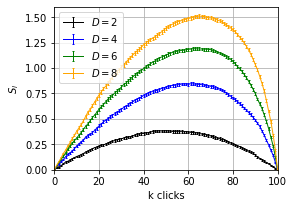

In [18]:
N_plot = 100
i_site = (N_plot+1)//2

plt.figure(figsize=figsize)

i_N = np.argmin(np.abs(v_N-N_plot))

x_axis = np.linspace(0,N_plot,N_plot+1)


for i_p in range(N_p):
    p = v_p[i_p]
    dat = data_list_fixed[i_N][i_p,:,i_site]
    err = err_list_fixed[i_N][i_p,:,i_site]

    #_ = plt.errorbar(x_axis,0.5*(dat+np.flip(dat)), yerr=err_S[i_L,i_jump,:], linewidth = 1, color = 'black')
    _ = plt.errorbar(x_axis,dat , yerr=err, linewidth = 1, capsize=1, color=clr[i_p], label=r"$D="+str(p)+"$")
    #_ = plt.plot(x_axis,dat, linewidth = 1, color='blue')

plt.xlim(0,N_plot)
plt.ylim(bottom=0.)
plt.grid(True)

plt.xlabel("k clicks")
plt.ylabel(r"$S_l$")
plt.legend()
#plt.title("N="+str(N_plot))

plt.savefig("figs_paper/S_half_" + str(N_plot) + "_fixed.pdf", bbox_inches='tight')

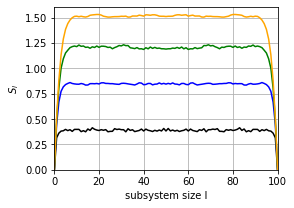

In [58]:

N_plot = 100


plt.figure(figsize=figsize)

i_N = np.argmin(np.abs(v_N-N_plot))

x_axis = np.linspace(0,N_plot,N_plot+1)


for i_p in range(N_p):
    p = v_p[i_p]
    
    i_jump = np.argmax(data_list_fixed[i_N][i_p,:,N_plot//2])
    
    dat = data_list_fixed[i_N][i_p,i_jump,:]
    err = err_list_fixed[i_N][i_p,i_jump,:]
    dat = 0.5*(dat+np.flip(dat))
    err = 0.5*np.sqrt(err**2+np.flip(err)**2)
    #_ = plt.errorbar(x_axis,0.5*(dat+np.flip(dat)), yerr=err_S[i_L,i_jump,:], linewidth = 1, color = 'black')
    #_ = plt.errorbar(x_axis,dat , yerr=err, linewidth = 1, capsize=0., color=clr[i_p], label=r"$D="+str(p)+"$")
    #_ = plt.plot(x_axis,dat, linewidth = 1, color='blue')
    _ = plt.plot(x_axis,dat ,  color=clr[i_p], label=r"$D="+str(p)+"$")

plt.xlim(0,N_plot)
plt.ylim(bottom=0.)
plt.grid(True)

plt.xlabel("subsystem size l")
plt.ylabel(r"$S_l$")
#plt.legend(loc="right")
#plt.title("N="+str(N_plot))

plt.savefig("figs_paper/St_" + str(N_plot) + "_" + str(i_jump) + "_fixed.pdf", bbox_inches='tight')

In [59]:
i_jump

65

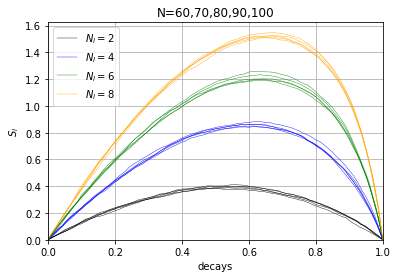

In [32]:
plt.figure(figsize=(6,4))

for N_plot in v_N:
    i_site = (N_plot+1)//2

    i_N = np.argmin(np.abs(v_N-N_plot))

    x_axis = np.linspace(0,N_plot,N_plot+1)/N_plot


    for i_p in range(N_p):
        p = v_p[i_p]
        dat = data_list_fixed[i_N][i_p,:,i_site]
        #err = err_list_fixed[i_N][i_p,:,i_site]

        if i_N==0:
            _ = plt.plot(x_axis,dat , linewidth = .4, color=clr[i_p], label=r"$N_l="+str(p)+"$")
        else:
            _ = plt.plot(x_axis,dat , linewidth = .4, color=clr[i_p], label="")
        
        #_ = plt.plot(x_axis,dat, linewidth = 1, color='blue')

plt.xlim(0,1)
plt.ylim(bottom=0.)
plt.grid(True)

plt.xlabel("decays")
plt.ylabel(r"$S_l$")
plt.legend()
plt.title("N=60,70,80,90,100")

plt.savefig("figs_paper/S_half_all_N_fixed.pdf", bbox_inches='tight')

In [28]:
data_list_sca

30